## Libaries

In [1]:
# Main libraries installation
!pip install geopandas owslib requests contextily osmnx > nul

In [2]:
#!pip install --upgrade distutils > nul

In [3]:
# Import necessary libraries
from owslib.wfs import WebFeatureService  # Library for working with Web Feature Service
import osmnx as ox  # Library for retrieving OpenStreetMap data and network analysis
import geopandas as gpd  # Library for geospatial data manipulation and analysis
from shapely.geometry import Point, Polygon  # Library for handling geometric shapes
import pandas as pd  # Library for data manipulation and analysis
import os  # Library for operating system-related functionality
import io  # Library for input/output operations
import rasterio  # Library for reading and writing raster data
import numpy as np  # Library for numerical operations
from rasterio.crs import CRS  # Library for handling coordinate reference systems in raster data
import json  # Library for working with JSON data
import contextily as cx  # Library for basemaps and context tiles
import matplotlib.pyplot as plt  # Library for creating visualizations
import requests  # Library for making HTTP requests
from io import BytesIO  # Library for handling binary data
import zipfile  # Library for handling ZIP files
import pyproj  # Library for performing cartographic projections
import seaborn as sns  # Library for statistical data visualization
import urllib.request  # Library for making URL requests
from urllib.error import ContentTooShortError  # Library for handling content too short errors during URL requests
from shapely.geometry import Polygon  # Library for handling polygon geometries
import plotly.express as px  # Library for creating interactive visualizations
import warnings  # Library for managing warnings
import plotly.io as pio  # Library for handling Plotly I/O
from IPython.display import Image  # Library for displaying images in IPython environment

# Disable deprecation warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


## Data Ingestion

In [4]:
# Specify the name of the city or area of interest
city = "Ciudad Autónoma de Buenos Aires"

# Download OSM data using Overpass API
tags = {"amenity": "bar"}
gdf2 = ox.geometries_from_place(city, tags)

# Filter and create a GeoPandas DataFrame with relevant data
gdf2 = gdf2[gdf2['amenity'] == 'bar']

gdf2 = gdf2.reset_index()

# Filter only Point geometries
gdf2 = gdf2[gdf2['geometry'].geom_type == 'Point']

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13232\188318385.py:6: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.
  gdf2 = ox.geometries_from_place(city, tags)


## Data exploring

In [5]:
# Display information about the GeoDataFrame
gdf2.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 377 entries, 0 to 376
Data columns (total 87 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   element_type             377 non-null    object  
 1   osmid                    377 non-null    int64   
 2   amenity                  377 non-null    object  
 3   name                     348 non-null    object  
 4   geometry                 377 non-null    geometry
 5   addr:housenumber         142 non-null    object  
 6   addr:street              173 non-null    object  
 7   cuisine                  14 non-null     object  
 8   internet_access          26 non-null     object  
 9   old_name                 1 non-null      object  
 10  opening_hours            51 non-null     object  
 11  source                   41 non-null     object  
 12  wikidata                 4 non-null      object  
 13  wikimedia_commons        4 non-null      object  
 14  ad

In [6]:
# Display the first few rows of the GeoDataFrame
gdf2.head()

,element_type,osmid,amenity,name,geometry,addr:housenumber,addr:street,cuisine,internet_access,old_name,...,clothes,nodes,building,instagram,building:levels,toilets:wheelchair,website:menu,contact:mobile,height,opening_hours:kitchen
0,node,479757409,bar,Macondo Bar,POINT (-58.43028 -34.58851),NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,node,479757410,bar,Utopia,POINT (-58.43060 -34.58867),1590,Serrano,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,node,479757411,bar,Prólogo,POINT (-58.43063 -34.58874),1580,Serrano,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,node,479757412,bar,Tazz,POINT (-58.43065 -34.58885),1556,Serrano,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,node,724259211,bar,Aroma Freddo,POINT (-58.37534 -34.60299),NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Print the original Coordinate Reference System (CRS) of the GeoDataFrame
print(gdf2.crs)

epsg:4326


## Data Visualization

In [8]:
gdf2.to_crs(epsg=4326)

,element_type,osmid,amenity,name,geometry,addr:housenumber,addr:street,cuisine,internet_access,old_name,...,clothes,nodes,building,instagram,building:levels,toilets:wheelchair,website:menu,contact:mobile,height,opening_hours:kitchen
0,node,479757409,bar,Macondo Bar,POINT (-58.43028 -34.58851),NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,node,479757410,bar,Utopia,POINT (-58.43060 -34.58867),1590,Serrano,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,node,479757411,bar,Prólogo,POINT (-58.43063 -34.58874),1580,Serrano,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,node,479757412,bar,Tazz,POINT (-58.43065 -34.58885),1556,Serrano,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,node,724259211,bar,Aroma Freddo,POINT (-58.37534 -34.60299),NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,node,11374867037,bar,Vinoteca,POINT (-58.42252 -34.58801),NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
373,node,11374906591,bar,Puerta Uno Bar,POINT (-58.44974 -34.55778),NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
374,node,11414670710,bar,New Fama,POINT (-58.39055 -34.60548),1685,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
375,node,11414682192,bar,Kooperation BAs,POINT (-58.38930 -34.60377),NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Rename the 'name' column to 'bar name'
gdf2 = gdf2.rename(columns={'name': 'Bar name'})

In [10]:
# Create a map using Plotly Express
fig = px.scatter_mapbox(gdf2, 
                        lat=gdf2.geometry.y, 
                        lon=gdf2.geometry.x,
                        color='Bar name',
                        color_continuous_scale='blues',
                        mapbox_style='dark',
                        zoom=12)

# Display the map
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [11]:
# Assuming 'fig' is your Plotly figure
pio.write_html(fig, 'data/web/map_web.html')

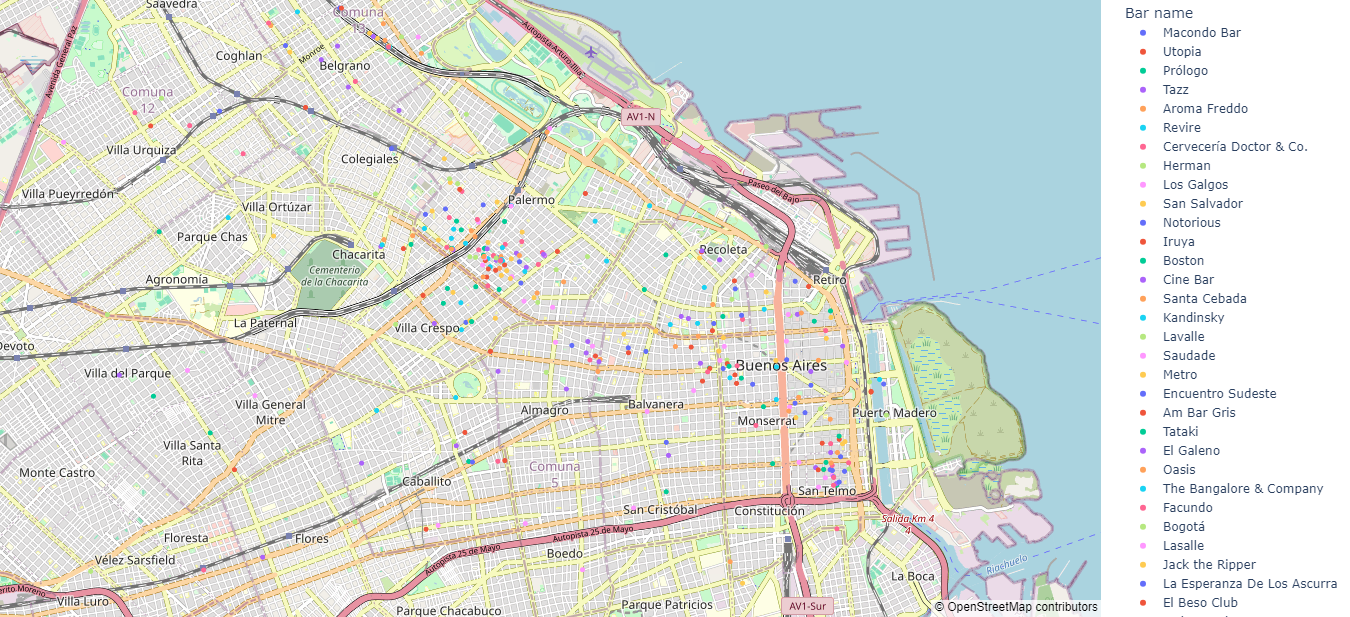

In [12]:
# Path to your PNG file
ruta_archivo_png = 'data/web/web_plot.png'  # Replace with the correct path

# Display the image in the notebook
Image(filename=ruta_archivo_png)